# Predicting Fraudaulent Transaction

## Description of a Dataset
This dataset contain 10 columns and 6362620 rows and this dataset contain attributes such as type,amount and isFraud etc.
I am  going to analyze the data deeply and try to get some useful insights to predict fraud transactions for a financial       company.I am going to develop machine learning model by using classification algorithms like random forest.
I am going to use pandas, numpy library for analysis, matplotlib for visualization and sklearn for training and testing         data.
    
It includes 11 variables.These variables are described below: 

   1. step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days        s s       simulation).
    
   2. type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

   3. amount - amount of the transaction in local currency.

   4. nameOrig - customer who started the transaction

   5. oldbalanceOrg - initial balance before the transaction

   6. newbalanceOrig - new balance after the transaction

   7. nameDest - customer who is the recipient of the transaction

   8. oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that       start with M (Merchants).

   9. newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start       with M (Merchants).

   10. isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the            fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by          transferring to another account and then cashing out of the system.

   11. isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal            attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Goal of the Project
In this projet, We're going to develp a model for predicting fraudulent transactions for a finanicial company and use insights from the model to develop an actionable plan. 

## Tools used
    1. pandas for data manipulation
    2. numpy is mostly used for working in numerical values
    3. Seaborn and matplotlib  for visualization graph.
    4. Sklearn for training and testing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [3]:
df=pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Perform EDA

In [9]:
df.select_dtypes(exclude="object").corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: xlabel='type', ylabel='count'>

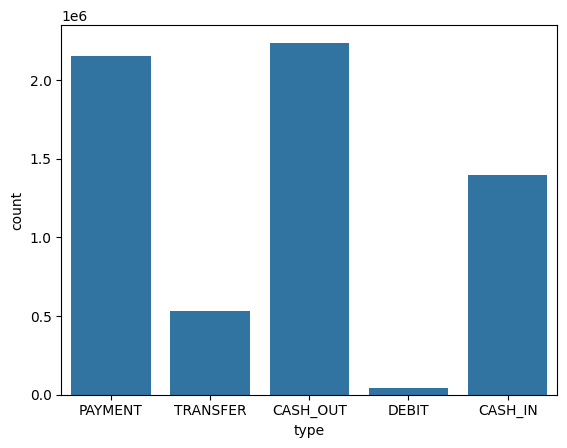

In [10]:
sns.countplot(x=df["type"])

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

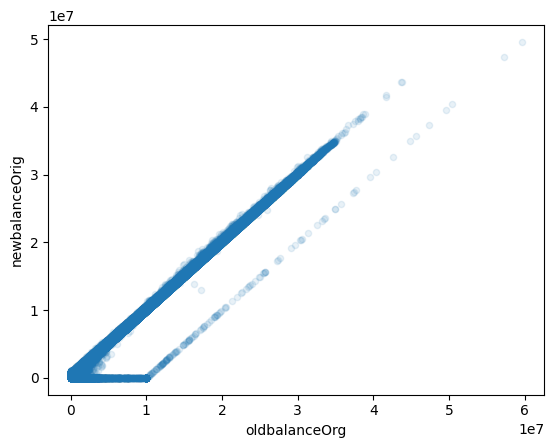

In [11]:
df.plot(kind="scatter",x="oldbalanceOrg",y="newbalanceOrig",alpha=0.1)

<Axes: xlabel='isFraud', ylabel='amount'>

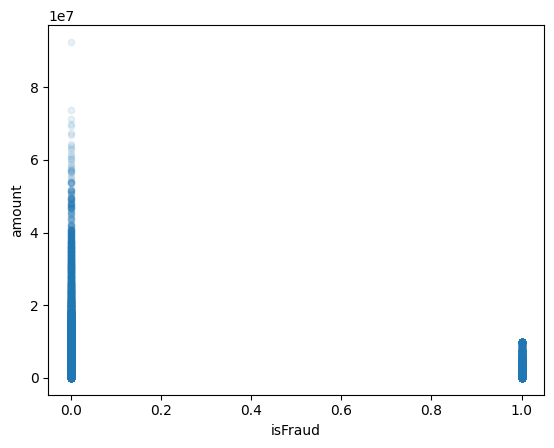

In [12]:
df.plot(kind="scatter",x="isFraud",y="amount",alpha=0.1)

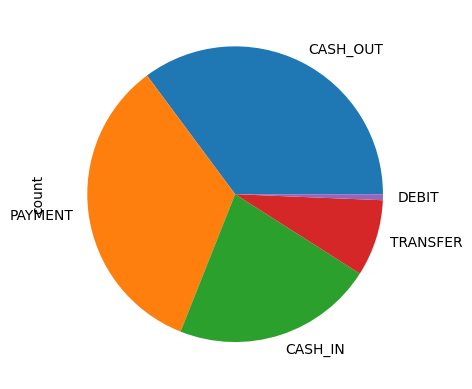

In [13]:
df["type"].value_counts().plot(kind="pie")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder =LabelEncoder()

In [16]:
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

In [17]:
df[['nameOrig', 'nameDest']]

,nameOrig,nameDest
0,757869,1662094
1,2188998,1733924
2,1002156,439685
3,5828262,391696
4,3445981,828919
...,...,...
6362615,5651847,505863
6362616,1737278,260949
6362617,533958,108224
6362618,2252932,319713


In [18]:
df['type']= label_encoder.fit_transform(df['type']) 

In [19]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


## train and test data splitting


In [20]:
x= df.drop('isFraud', axis=1)
y = df['isFraud']

In [21]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,0


In [22]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
x_train=scaler.fit_transform(x_train)

In [27]:
x_train

array([[ 8.14183735e-02,  9.52131679e-01, -2.73814916e-01, ...,
        -3.22741321e-01, -3.32086949e-01, -1.47005582e-03],
       [ 5.94231284e-01, -5.29247966e-01,  1.97629541e-01, ...,
        -2.64191698e-01, -1.96679684e-01, -1.47005582e-03],
       [ 2.47688690e+00,  1.69282150e+00,  8.66300346e+00, ...,
         1.40480637e+00,  2.74062147e+00, -1.47005582e-03],
       ...,
       [ 6.08280953e-01, -5.29247966e-01,  1.84620404e-01, ...,
        -2.69723706e-01, -2.03936964e-01, -1.47005582e-03],
       [-5.92965728e-01,  9.52131679e-01, -2.94321896e-01, ...,
        -3.22741321e-01, -3.32086949e-01, -1.47005582e-03],
       [ 9.52497838e-01,  9.52131679e-01, -2.92224247e-01, ...,
        -3.22741321e-01, -3.32086949e-01, -1.47005582e-03]])

In [28]:
x_test=scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf=LogisticRegression()

In [31]:
clf.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=clf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.999255023873813

In [35]:
from sklearn.metrics import confusion_matrix

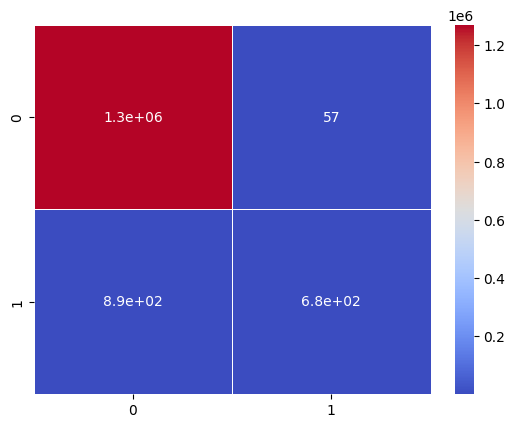

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', linewidths=0.5, annot=True);

In [44]:
inp=[1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0]

In [49]:
y=clf.predict([inp])

In [57]:
y

array([0])